In [1]:
#importing nesessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import random
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import roc_auc_score,roc_curve, auc, precision_score, recall_score, confusion_matrix
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from math import sqrt
import itertools
# explicitly require this experimental featur
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor
import lightgbm as lgb

In [2]:
#reading clean dataset from part 1
df_data = pd.read_csv('../Step 1. Data Wrangling/DataWrangling_dataset_forML.csv', index_col='api')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5370 entries, 33007016320000 to 33105025590000
Data columns (total 56 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   bottom                             5370 non-null   int64  
 1   fluid_bbl                          5370 non-null   int64  
 2   fluid_bbl_per_ft                   5370 non-null   int64  
 3   fluid_gal                          5370 non-null   int64  
 4   fluid_gal_per_ft                   5370 non-null   int64  
 5   ft_per_stage                       5370 non-null   int64  
 6   lateral_length                     5370 non-null   int64  
 7   max_treat_press                    5370 non-null   int64  
 8   max_treat_rate                     5370 non-null   float64
 9   propp_lbs                          5370 non-null   int64  
 10  propp_lbs_per_ft                   5370 non-null   int64  
 11  stages                           

In [3]:
df_data.describe()

,bottom,fluid_bbl,fluid_bbl_per_ft,fluid_gal,fluid_gal_per_ft,ft_per_stage,lateral_length,max_treat_press,max_treat_rate,propp_lbs,...,Produced_Pools_LODGEPOLE,Produced_Pools_MADISON,"Produced_Pools_MADISON,TYLER",Produced_Pools_ORDOVICIAN,Produced_Pools_RED RIVER,Produced_Pools_SANISH,Produced_Pools_SPEARFISH,Produced_Pools_SPEARFISH/MADISON,Produced_Pools_THREE FORKS,Produced_Pools_TYLER
count,5370.000000,5370.000000,5370.000000,5.370000e+03,5370.000000,5370.000000,5370.000000,5370.00000,5370.000000,5.370000e+03,...,5370.000000,5370.0,5370.000000,5370.0,5370.000000,5370.000000,5370.0,5370.0,5370.000000,5370.0
mean,19424.424209,49014.859218,5.717318,2.058626e+06,261.320112,3342.955493,8727.339106,7563.13054,33.407058,2.630058e+06,...,0.000186,0.0,0.000186,0.0,0.004842,0.009497,0.0,0.0,0.000372,0.0
std,2093.418472,23462.546120,8.345926,9.854260e+05,353.738982,4062.701460,1914.504407,2356.93023,16.099407,1.172218e+06,...,0.013646,0.0,0.013646,0.0,0.069420,0.096999,0.0,0.0,0.019297,0.0
min,9530.000000,0.000000,0.000000,0.000000e+00,0.000000,3.000000,6.000000,0.00000,0.000000,0.000000e+00,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
25%,18912.250000,31141.250000,3.000000,1.307932e+06,167.000000,304.000000,8736.250000,7320.50000,30.300000,1.894481e+06,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
50%,20133.000000,47862.000000,5.000000,2.010204e+06,231.000000,355.000000,9346.000000,8260.00000,36.000000,2.610980e+06,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
75%,20720.000000,63349.250000,7.000000,2.660668e+06,308.750000,8840.000000,9686.750000,8840.00000,41.200000,3.339392e+06,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
max,26908.000000,178479.000000,463.000000,7.496118e+06,19470.000000,12636.000000,19562.000000,12132.00000,153.400000,1.276420e+07,...,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,0.0


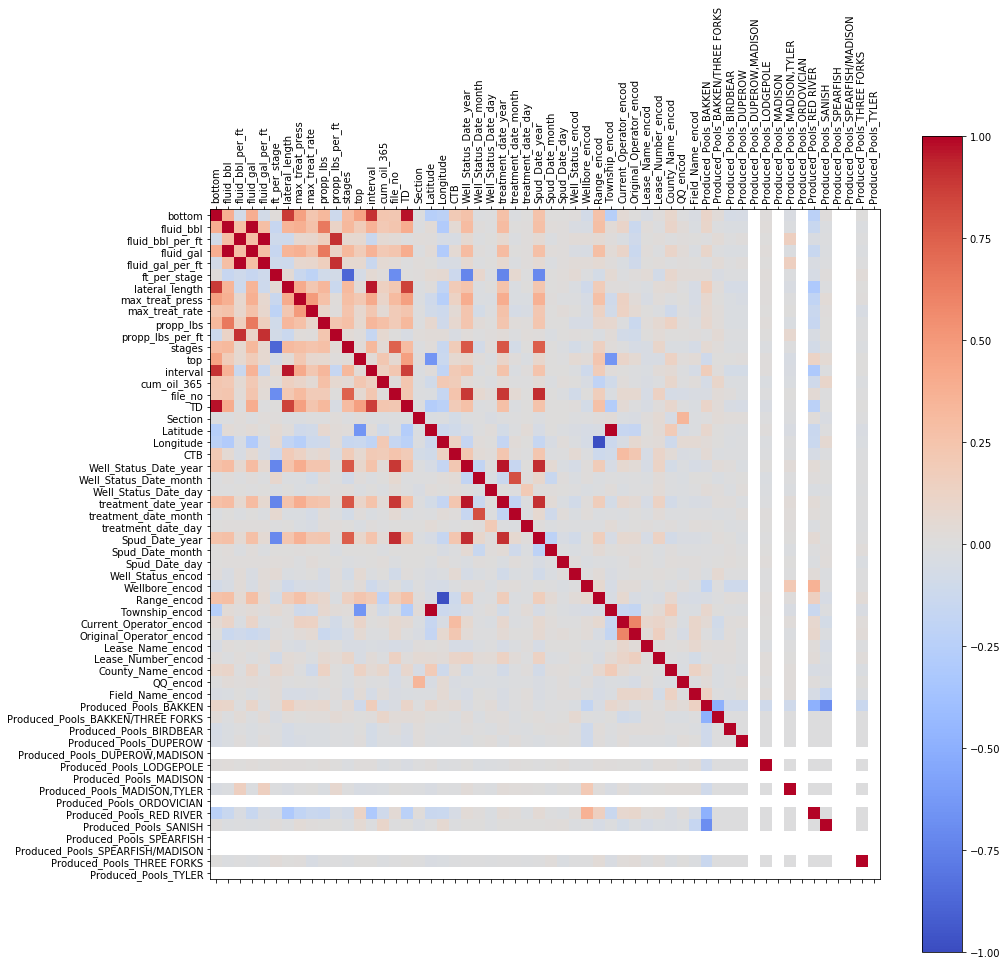

In [4]:
#plot data correlation matrix
corr = df_data.corr()
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot()
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_data.columns)
ax.set_yticklabels(df_data.columns)
plt.show()

In [5]:
corr.sort_values(by=['cum_oil_365']).cum_oil_365

Range_encod                         -0.195477
Produced_Pools_RED RIVER            -0.095383
Township_encod                      -0.090279
Latitude                            -0.089867
Produced_Pools_BAKKEN               -0.056208
Wellbore_encod                      -0.044427
Lease_Name_encod                    -0.032764
Produced_Pools_MADISON,TYLER        -0.028427
Produced_Pools_LODGEPOLE            -0.027044
Well_Status_Date_day                -0.022444
Produced_Pools_BIRDBEAR             -0.022168
Section                             -0.020926
Produced_Pools_THREE FORKS          -0.017766
Spud_Date_month                     -0.016035
Produced_Pools_DUPEROW              -0.015907
Lease_Number_encod                  -0.013073
Original_Operator_encod             -0.012808
treatment_date_day                  -0.007491
QQ_encod                            -0.006883
treatment_date_month                -0.005210
Well_Status_encod                    0.000341
Well_Status_Date_month            

In [6]:
#devide dataset into train, validate and test
df_data['is_train'] = np.random.uniform(0, 1, len(df_data)) <= .75
Train, Test = df_data[df_data['is_train']==True], df_data[df_data['is_train']==False]
Train['is_train'] = np.random.uniform(0, 1, len(Train)) <= .75
Train, Validate = Train[Train['is_train']==True], Train[Train['is_train']==False]
print(len(df_data))
print(len(Train))
print(len(Validate))
print(len(Test))

5370
2998
989
1383


C:\Users\olyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
def train_validate(features, clf):
    
    #Select input datasets and labels
    x_train = Train[features].values
    y_train = Train["cum_oil_365"].values
    x_validate = Validate[features].values
    y_validate = Validate["cum_oil_365"].values

    clf.fit(x_train, y_train)

    #Predicting on training dataset
    modelPred_train = clf.predict(x_train)
    
    #Predicting on validation dataset
    modelPred_valid = clf.predict(x_validate)

    meanSquaredError_train=mean_squared_error(y_train, modelPred_train)
    rootMeanSquaredError_train = sqrt(meanSquaredError_train)
    print("RMSE_train:", rootMeanSquaredError_train)
    
    meanSquaredError_valid=mean_squared_error(y_validate, modelPred_valid)
    rootMeanSquaredError_valid = sqrt(meanSquaredError_valid)
    print("RMSE_valid:", rootMeanSquaredError_valid)
    
    return  rootMeanSquaredError_train, rootMeanSquaredError_valid

In [8]:
def train_test(features, clf):
    
    #Select input datasets and labels
    x_train = Train[features].values
    y_train = Train["cum_oil_365"].values
    x_test = Test[features].values
    y_test = Test["cum_oil_365"].values

    clf.fit(x_train, y_train)

    #Predicting on validation dataset
    modelPred = clf.predict(x_test)

    meanSquaredError=mean_squared_error(y_test, modelPred)
    rootMeanSquaredError = sqrt(meanSquaredError)
    print("RMSE:", rootMeanSquaredError)
    
    plt.plot(y_test, modelPred,'.')
    plt.plot(range(0,250000,100), range(0,250000,100),'-')
    plt.xlabel('True value')
    plt.ylabel('Predicted value')
    plt.title('First Year Cumulative Oil Production')
    
    return rootMeanSquaredError

In [9]:
features=Train.keys().drop(['cum_oil_365','is_train'])
rf = RandomForestRegressor(n_estimators=1000,random_state=42,n_jobs=-1)   #RMSE: 27914 (n_estimators=1000)
rmse_min = train_validate(features, rf)

RMSE_train: 10737.96817503133
RMSE_valid: 27523.873796445987


In [10]:
drop_list=['cum_oil_365','is_train']
rf = RandomForestRegressor(n_estimators=1000,random_state=42,n_jobs=-1)   
for i in features:
    features=Train.keys().drop(['cum_oil_365','is_train'])
    features = features.drop(i)
    rmse = train_validate(features, rf)
    if rmse < rmse_min:
        print('--------------->',i)
        drop_list.append(i)

RMSE_train: 10734.988508851951
RMSE_valid: 27506.094397392215
---------------> bottom
RMSE_train: 10739.604475538603
RMSE_valid: 27488.37707554953
RMSE_train: 10743.494761549946
RMSE_valid: 27521.831184237315
RMSE_train: 10740.318663561337
RMSE_valid: 27510.635269917442
RMSE_train: 10730.322052703994
RMSE_valid: 27537.32088497636
---------------> fluid_gal_per_ft
RMSE_train: 10720.880679007216
RMSE_valid: 27541.907629623704
---------------> ft_per_stage
RMSE_train: 10757.79813675088
RMSE_valid: 27486.008671739677
RMSE_train: 10738.0176613519
RMSE_valid: 27466.299139997976
RMSE_train: 10757.391673358174
RMSE_valid: 27536.770877313
RMSE_train: 10739.811055518372
RMSE_valid: 27464.681632476968
RMSE_train: 10738.819780090633
RMSE_valid: 27508.326159204327
RMSE_train: 10755.580415698883
RMSE_valid: 27549.836365007282
RMSE_train: 10764.337675680927
RMSE_valid: 27533.07613609934
RMSE_train: 10739.012408691218
RMSE_valid: 27494.15154486371
RMSE_train: 10750.939355311959
RMSE_valid: 27563.99613

In [11]:
#features=Train.keys().drop(['cum_oil_365','is_train','propp_lbs','Spud_Date_day','Spud_Date_month','Lease_Number_encod',
#                            'treatment_date_day', 'treatment_date_month','max_treat_press','fluid_gal_per_ft','bottom',
#                            'Lease_Name_encod','Produced_Pools_BAKKEN','fluid_gal','TD','Section','Well_Status_Date_month',
#                           'Well_Status_Date_day','Well_Status_Date_year','QQ_encod','ft_per_stage','lateral_length',
#                           'Township_encod','Produced_Pools_BAKKEN/THREE FORKS','Produced_Pools_SANISH'])
features = Train.keys().drop(drop_list)
rf = RandomForestRegressor(n_estimators=1000,random_state=42,n_jobs=-1)   #RMSE:  26980 (n_estimators=1000)
rmse_min = train_validate(features, rf)

RMSE_train: 10541.486367418032
RMSE_valid: 27203.465029503706


In [16]:
drop_list

['cum_oil_365',
 'is_train',
 'bottom',
 'fluid_gal_per_ft',
 'ft_per_stage',
 'Well_Status_Date_day',
 'treatment_date_year',
 'treatment_date_day',
 'Spud_Date_year',
 'Spud_Date_day',
 'Well_Status_encod',
 'Lease_Name_encod',
 'Lease_Number_encod',
 'QQ_encod',
 'Produced_Pools_BAKKEN',
 'Produced_Pools_BAKKEN/THREE FORKS',
 'Produced_Pools_BIRDBEAR']

In [12]:
features

Index(['fluid_bbl', 'fluid_bbl_per_ft', 'fluid_gal', 'lateral_length',
       'max_treat_press', 'max_treat_rate', 'propp_lbs', 'propp_lbs_per_ft',
       'stages', 'top', 'interval', 'file_no', 'TD', 'Section', 'Latitude',
       'Longitude', 'CTB', 'Well_Status_Date_year', 'Well_Status_Date_month',
       'treatment_date_month', 'Spud_Date_month', 'Wellbore_encod',
       'Range_encod', 'Township_encod', 'Current_Operator_encod',
       'Original_Operator_encod', 'County_Name_encod', 'Field_Name_encod',
       'Produced_Pools_DUPEROW', 'Produced_Pools_DUPEROW,MADISON',
       'Produced_Pools_LODGEPOLE', 'Produced_Pools_MADISON',
       'Produced_Pools_MADISON,TYLER', 'Produced_Pools_ORDOVICIAN',
       'Produced_Pools_RED RIVER', 'Produced_Pools_SANISH',
       'Produced_Pools_SPEARFISH', 'Produced_Pools_SPEARFISH/MADISON',
       'Produced_Pools_THREE FORKS', 'Produced_Pools_TYLER'],
      dtype='object')

In [13]:
#train Classifier
xb = xgb.XGBRFRegressor(random_state=42,n_jobs=-1)
rf = RandomForestRegressor(n_estimators=1000,random_state=42,n_jobs=-1) 
gb = GradientBoostingRegressor(random_state=42)               
hg = HistGradientBoostingRegressor(random_state=42)

clf =[xb,rf,gb,hg]

for cl in clf:
    rmse = train_validate(features, cl)[-1]
    if rmse < rmse_min[-1]:
        print('--------------->',cl)

RMSE_train: 28672.260792742913
RMSE_valid: 30569.012254483532
RMSE_train: 10541.486367418032
RMSE_valid: 27203.465029503706
RMSE_train: 27043.866025589272
RMSE_valid: 28889.564372166282
RMSE_train: 15598.237142971135
RMSE_valid: 26400.125178093862
---------------> HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=100, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=42, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)


In [14]:
#Select input datasets and labels
x_train = Train[features].values
y_train = Train["cum_oil_365"].values
x_test = Test[features].values
y_test = Test["cum_oil_365"].values

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

# Parameter Tuning
model = HistGradientBoostingRegressor(random_state=42)
param_dist = {'learning_rate': [0.05,0.1,0.5], #number of trees in the foreset
              'max_bins': [200,255], #max number of features considered for splitting a node
              'max_depth': [45, 50, 55, None], #max number of levels in each decision tree
              'max_iter': [100, 200, 300],  #min number of data points placed in a node before the node is split
              'max_leaf_nodes': [15, 20, 25],    #min number of data points allowed in a leaf node
              'min_samples_leaf': [15,20,25]}       #method for sampling data points (with or without replacement)

#grid_search = GridSearchCV(model, param_grid=param_dist, cv=3, verbose=10, n_jobs=-1)
#grid_search.fit(x_train, y_train)
#grid_search.best_estimator_

clf_random = RandomizedSearchCV(estimator = model, param_distributions = param_dist, random_state=42)
clf_random.fit(x_train, y_train)
clf_random.best_estimator_

#auc(model, train, test)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.05,
                              loss='least_squares', max_bins=200, max_depth=55,
                              max_iter=300, max_leaf_nodes=15,
                              min_samples_leaf=15, n_iter_no_change=None,
                              random_state=42, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)

RMSE: 27034.013336437954


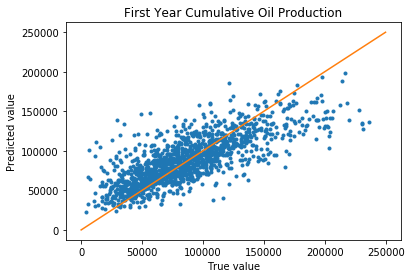

In [18]:
rmse_min = train_test(features,hg)